# Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment

In [2]:
# Read the iris_dataset to the python environment.
# Loading the excel file into a pandas dataframe.

iris_data= pd.read_excel(r'C:\ict\Assignments\8. Case study 7 Supervised learning\iris.xls')
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Do necessary pre-processing steps.

In [4]:
# check iris_data

iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to identify number of rows and columns

iris_data.shape

(150, 5)

In [7]:
# 150 rows & 5 columns

In [8]:
# to check if there is any null value
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
# some missing values are there

Flling missing values

In [10]:
# to identify the data type of each column
iris_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [11]:
# both numerical and categorical data are present
# we will plot numerical values and check  this qness

<function matplotlib.pyplot.show(close=None, block=None)>

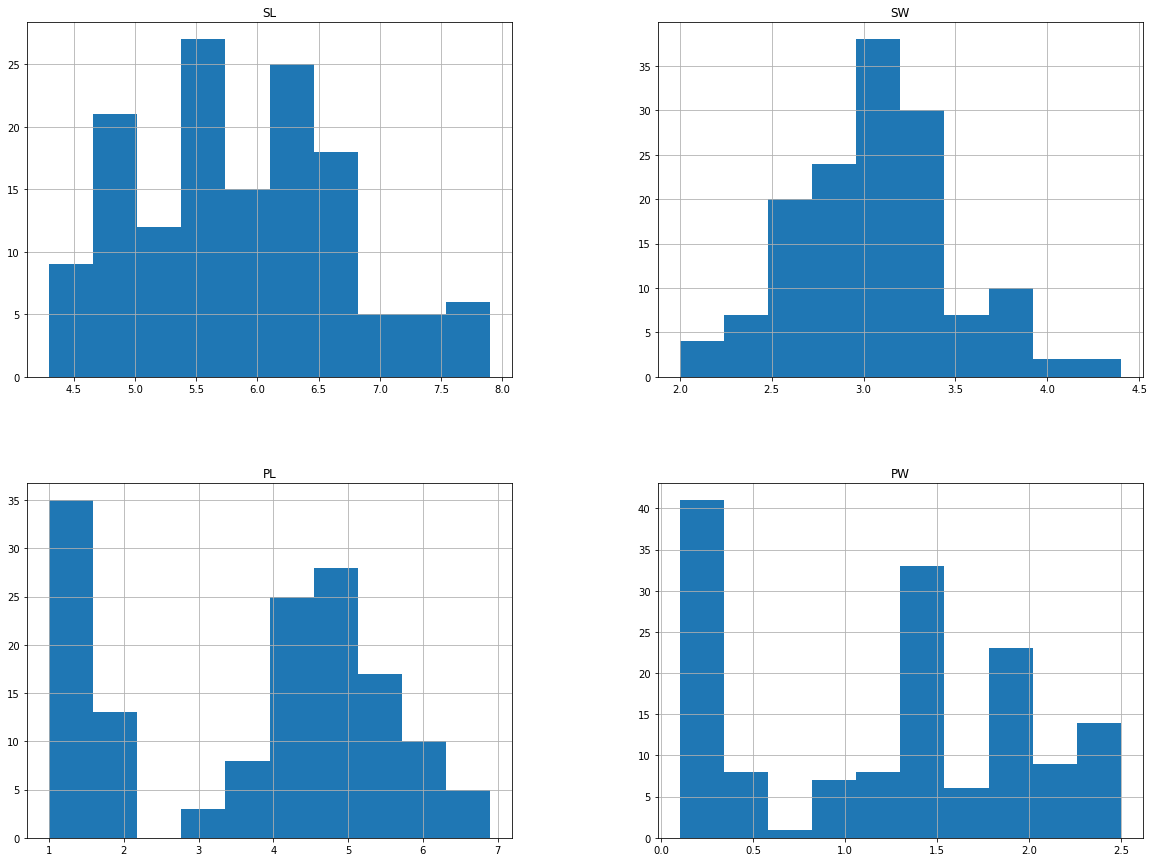

In [12]:
freqgraph = iris_data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show

In [13]:
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [14]:
for i in ['SL', 'SW', 'PL']:
    iris_data[i] = iris_data[i].fillna(iris_data[i].median())

In [15]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
# no more null values present

# OUTLIERS

In [17]:
# outliers are observations which differ from an overall pattern on a sample dataset
# outliers badly effect mean and standard deviaion
# to check whether outliers are present in the dataset 
# we will plot box plots of different numerical variables
# we will plot SL(Sepal Length) column first

1..Checking for outliers in 'SL' column

Text(0.5, 1.0, 'Box Plot Of SL')

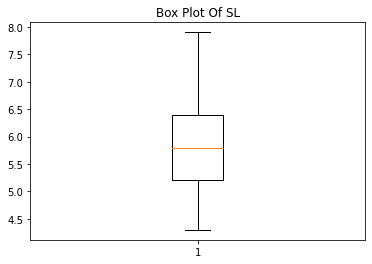

In [18]:
plt.boxplot(iris_data['SL'])
plt.title('Box Plot Of SL')

In [19]:
# Now we will find differet quartile values of 'SL' column
#create variable Q1,Q2,Q3 using the percentile parameter in numpy
Q1 = np.percentile(iris_data['SL'], 25, interpolation='midpoint')
Q2 = np.percentile(iris_data['SL'], 50, interpolation='midpoint')
Q3 = np.percentile(iris_data['SL'], 75, interpolation='midpoint')

# CHECK QUARTILE VALUES
print(Q1)
print(Q2)
print(Q3)

# find interquartile range IQR
IQR = Q3-Q1
IQR

# from IQR we can find the lower limit and the upper limit and we can remove the values 
#     which are below lower limit and above upper limit
# for that creating a variable lower limit and upper limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR


print(low_lim)
print(up_lim)

outlier = [] 
for x in iris_data['SL']: 
    if((x>up_lim)or(x<low_lim)): 
      outlier.append(x)

print('\noutlier=',outlier)

5.2
5.8
6.4
3.4
8.200000000000001

outlier= []


In [20]:
# No outliers present SL

2..Checking for outliers in 'SW' column

Text(0.5, 1.0, 'Box Plot Of SW')

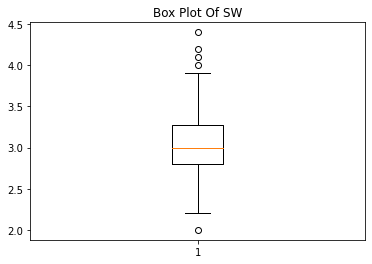

In [21]:
plt.boxplot(iris_data['SW'])
plt.title('Box Plot Of SW')

In [22]:
# Now we will find differet quartile values of 'SW' column
#create variable Q1,Q2,Q3 using the percentile parameter in numpy
Q1 = np.percentile(iris_data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(iris_data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(iris_data['SW'], 75, interpolation='midpoint')

# CHECK QUARTILE VALUES
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)

# find interquartile range IQR
IQR = Q3-Q1
print('IQR is',IQR)

# from IQR we can find the lower limit and the upper limit and we can remove the values 
#     which are below lower limit and above upper limit
# for that creating a variable lower limit and upper limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR


print('low_lim is',low_lim)
print('up_lim is',up_lim)

outlier = [] 
for x in iris_data['SW']: 
    if((x>up_lim)or(x<low_lim)): 
      outlier.append(x)

print('\noutlier=',outlier)

Q1 is 2.8
Q2 is 3.0
Q3 is 3.25
IQR is 0.4500000000000002
low_lim is 2.1249999999999996
up_lim is 3.9250000000000003

outlier= [4.0, 4.4, 4.1, 4.2, 2.0]


In [23]:
# to find the index of this outliers
#variable index1
ind1 = iris_data['SW']>up_lim # taking all the values which are greater than upper limit 
                                        #  to index 1 and am locating the index values of those values 
                                         #  from data
iris_data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [24]:
#we can drop it using data.drop
#no need to specify the axis because it is actually present in rows
iris_data.drop([14, 15, 32, 33],inplace=True)

In [25]:
ind2 = iris_data['SW']<low_lim # taking all the values which are lesser than lower limit 
                                        #  to index 2 and am locating the index values of those values 
                                         #  from data
iris_data.loc[ind2].index

Int64Index([60], dtype='int64')

In [26]:
iris_data.drop([60],inplace=True)

In [27]:
#again plot SW and check outliers are reduced

Text(0.5, 1.0, 'Box Plot Of SW')

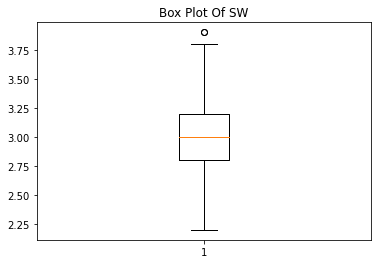

In [28]:
plt.boxplot(iris_data['SW'])
plt.title('Box Plot Of SW')

3..Checking for outliers in 'PL' column

Text(0.5, 1.0, 'Box Plot Of PL')

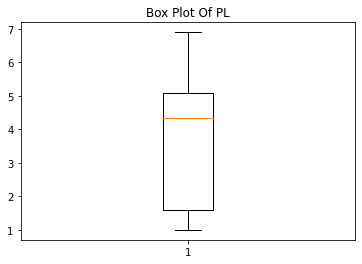

In [29]:
plt.boxplot(iris_data['PL'])
plt.title('Box Plot Of PL')

In [30]:
# Now we will find differet quartile values of 'SW' column
#create variable Q1,Q2,Q3 using the percentile parameter in numpy
Q1 = np.percentile(iris_data['PL'], 25, interpolation='midpoint')
Q2 = np.percentile(iris_data['PL'], 50, interpolation='midpoint')
Q3 = np.percentile(iris_data['PL'], 75, interpolation='midpoint')

# CHECK QUARTILE VALUES
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)

# find interquartile range IQR
IQR = Q3-Q1
print('IQR is',IQR)

# from IQR we can find the lower limit and the upper limit and we can remove the values 
#     which are below lower limit and above upper limit
# for that creating a variable lower limit and upper limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR


print('low_lim is',low_lim)
print('up_lim is',up_lim)

outlier = [] 
for x in iris_data['PL']: 
    if((x>up_lim)or(x<low_lim)): 
      outlier.append(x)

print('\noutlier=',outlier)

Q1 is 1.6
Q2 is 4.35
Q3 is 5.1
IQR is 3.4999999999999996
low_lim is -3.649999999999999
up_lim is 10.349999999999998

outlier= []


In [31]:
# No outliers present PL

4..Checking for outliers in 'PW' column

Text(0.5, 1.0, 'Box Plot Of PW')

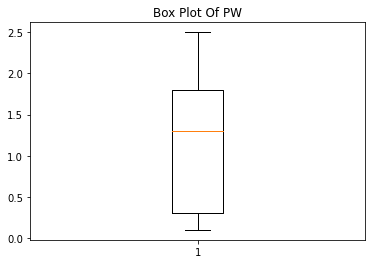

In [32]:
plt.boxplot(iris_data['PW'])
plt.title('Box Plot Of PW')

In [33]:
# Now we will find differet quartile values of 'SW' column
#create variable Q1,Q2,Q3 using the percentile parameter in numpy
Q1 = np.percentile(iris_data['PW'], 25, interpolation='midpoint')
Q2 = np.percentile(iris_data['PW'], 50, interpolation='midpoint')
Q3 = np.percentile(iris_data['PW'], 75, interpolation='midpoint')

# CHECK QUARTILE VALUES
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)

# find interquartile range IQR
IQR = Q3-Q1
print('IQR is',IQR)

# from IQR we can find the lower limit and the upper limit and we can remove the values 
#     which are below lower limit and above upper limit
# for that creating a variable lower limit and upper limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR


print('low_lim is',low_lim)
print('up_lim is',up_lim)

outlier = [] 
for x in iris_data['PW']: 
    if((x>up_lim)or(x<low_lim)): 
      outlier.append(x)

print('\noutlier=',outlier)

Q1 is 0.3
Q2 is 1.3
Q3 is 1.8
IQR is 1.5
low_lim is -1.95
up_lim is 4.05

outlier= []


In [34]:
# No outliers present in PW

# ENCODING

In [35]:
iris_data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [36]:
# we have done 4 columns out of 5 columns in the iris dataset
# one column left is the 'Classification' column which is the categorical variable
# most of the machine learning algorithms cannot handle categorical variables
# unless they are converted into a numerical value
# so we need to convert Classification to a numerical variable
#  can we do this using encoding

In [37]:
# Encoding - process of converting data from one form to another
# ENCODING is an important preprocessing step for the structured dataset in supervised learning

In [38]:
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

ONE HOT ENCODING

In [39]:
# checking how many different values are there in the 'Classification' column

iris_data.Classification.nunique()

3

In [40]:
# it has 3 different values
# after one hot encoding 3 different columns will be created

In [41]:
classification_encoded = pd.get_dummies(iris_data['Classification']) # this is the code to do one hot encoding using pandas
                        
classification_encoded

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [42]:
# now we have created the basic preprocessing steps 
# and we can create a linear regression model
# first we will do a correlation

<AxesSubplot:>

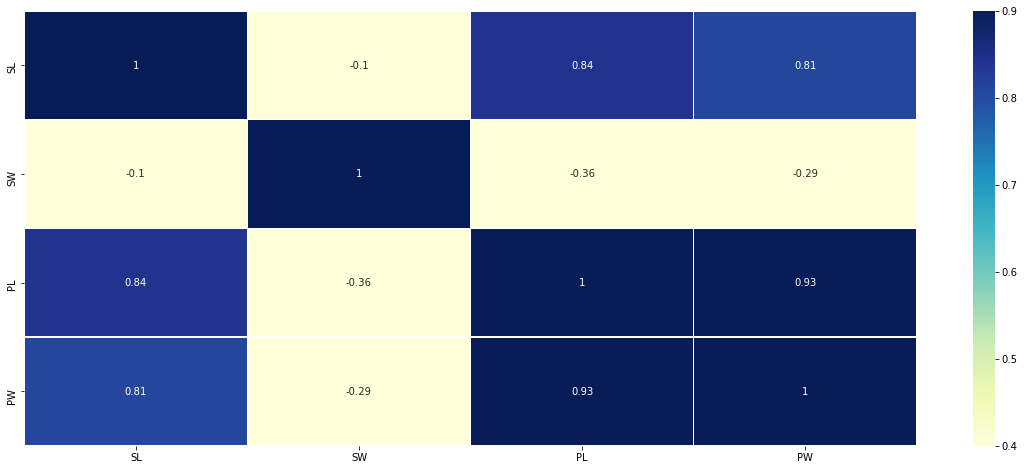

In [43]:
corrmatrix= iris_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [44]:
#Observation                        
#The Sepal Width and Length are not correlated 
#The Petal Width and Length are highly correlated
#We will use all the features for training the algorithm and check the accuracy.

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [45]:
# split the data set and create the model

In [46]:
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [47]:
# first am taking 'Classification' as my 'y' i need to predict that
#and taking evrything else as x
y = iris_data['Classification']
x = iris_data.drop('Classification', axis =1)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
# create instance of the model and storing it to variable logit_model
logit_model = LogisticRegression()

# fit this into xtrain and y train to create the model
logit_model.fit(x_train,y_train)

# next predict the values in the x test using this model created
# and storing those values to variable y_pred
y_pred = logit_model.predict(x_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# now lets see how our model performed
# in regression we use MSE & R squared value to measure the performance of our model
# in classification we will use metrices like confusion_matrix, accuracy_score, precision_score, 
# recall_score,f1_score to determine perfomance of our model

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print('Accuracy is:',accuracy_score(y_test,y_pred)) # we have to compare y test with y predictions


Accuracy is: 0.9310344827586207


In [54]:
# accuracy is 93%

# KNN

In [55]:
# K NEAREST NEIGHBOUR(KNN) is also present in the SKlearn library but in the neighbours class

In [56]:
# import and create the model

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
from sklearn import metrics # for checking the model accuracy

In [59]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of KNN is:  0.9310344827586207


<ipython-input-60-f9988bf31446>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


([<matplotlib.axis.XTick at 0xd15ad90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

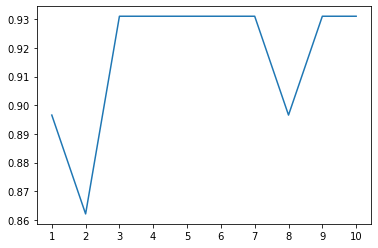

In [60]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

In [61]:
# The graph showing the accuracy for the KNN models using different values of n.

In [62]:
iris_data.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
# create an instance and store it in a variable 'dt_model'
dt_model = DecisionTreeClassifier()

In [65]:
# x_train (independant variable are features),dependent variable-y train
# it is a supervised machine learning algorithm 
# this can be done by using fit method that represents training on the x train and y train
# so i am fitting on that one

dt_model.fit(x_train,y_train)
dt_model.get_params()  # to get the parameter

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [66]:
# now am going to apply predict method on the testing data,that is x test and
# storing the predicted classes in y_prediction for convenience

y_pred = dt_model.predict(x_test)

In [67]:
# here the matric we are using is accuracy,it is available in sklearn.metric function and 
# takes two arguments , that is y test and y predictions
print('Accuracy on Decision tree model is', accuracy_score(y_test,y_pred))

Accuracy on Decision tree model is 0.896551724137931


# SVM

1. Linear SVM

In [68]:
# linear classifier
from sklearn.svm import SVC

In [69]:
# instance created and stored in svm_linear
# argument i am giving here is kernel = linear, it means representing as a linear based svm

svm_linear =SVC(kernel ='linear')


In [70]:
# based on the x train and y train am training the model using fit method, 
# this is taking some time,we will discuss it

svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [71]:
# now am predicting the classes and storing it into y_prediction and calculating the 
# accuracy score using ytest and y prediction

y_pred = svm_linear.predict(x_test)

In [72]:
print('Accuracy using linear svm is', accuracy_score(y_test,y_pred))

Accuracy using linear svm is 0.896551724137931


Standardising the features

In [73]:
# module importing from sklearn.preprocessing method
# storing it into a variable called sc

from sklearn.preprocessing import StandardScaler

In [74]:
sc = StandardScaler()

In [75]:
# for compatiblity issues like in machine learning the features giving to the model and 
# features am testing by the model should be compatible
# am fitting this standars scaler fuction on both x train and y train

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [76]:
# continuing the same linear kernal svm classifier 


svm_linear =SVC(kernel ='linear')

In [77]:
# fitting data into xtrain y train
 
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [78]:
# predicting the classes by using  x test and storing it to variable y_pred

y_pred = svm_linear.predict(x_test)

In [79]:
# apply accuracy score on ytest and y prediction

print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9310344827586207


In [80]:
# accuracy before scaling is 89% and after scaling is 93%

2. polynomial svm

In [81]:
# one more argument we need to mention here is the degree
# now am taking degree 3, we can take 2,3,4,5 based on requirement
# and storing it variable svm_poly

In [82]:
svm_poly = SVC(kernel='poly',degree=3)

In [83]:
# applying xtrain and y train fitting for learning the model from the data

svm_poly.fit(x_train,y_train)
svm_poly.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [84]:
# predicting on x test and storing into y prediction

y_pred = svm_poly.predict(x_test)

In [85]:
# calculating the accuracy using y test and y pred
# ytest is the original test data and y predict is the predicted values subclasses

print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.8620689655172413


3. Radial based kernel

In [86]:
svm_radial = SVC(kernel='rbf')

# rbf = radial basis function, it is sometimes called gaussian kernel


In [87]:
# applying xtrain and y train fitting for learning the model from the data

svm_radial.fit(x_train,y_train)
svm_radial.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [88]:
# predicting on x test and storing into y prediction

y_pred = svm_radial.predict(x_test)

In [89]:
# calculating the accuracy using y test and y pred
# ytest is the original test data and y predict is the predicted values subclasses

print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9310344827586207


# Random Forest

In [90]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [91]:
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)

In [92]:
# Train the model using the training sets
clf.fit(x_train, y_train)

RandomForestClassifier()

In [93]:
y_pred = clf.predict(x_test)

In [94]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9310344827586207


In [ ]:
Observations
Accuracy of logistic regression is 93%
Accuracy of KNN is 93%
Accuracy of Decision Tree is 89%
Accuracy of SVM 
  Linear svm before scaling is 89% and after scaling is 93%
  Polynomial svm is 86%  
  Radial svm is 93%
Accuracy of Random Forest is 93%  
  
